In [4]:
import os
import pandas as pd
import numpy as np
import Data_Savior_J
from Data_Savior_J import load_file
import scipy as sp
from scipy import signal
from ml_time_series import generate_envelope

In [98]:
files = ['data_154743','data_155334','data_155743','data_161034', 'data_161420']

DATAFILE = np.load('DB_HAND/'+files[0]+'.npy')
df = pd.DataFrame(DATAFILE, columns=['Sample','Label'])

df.head()

,Sample,Label
0,484.0,0.0
1,493.0,0.0
2,506.0,0.0
3,490.0,0.0
4,512.0,0.0


In [99]:
DATAFILE.shape

(30000, 2)

<IPython.core.display.Javascript object>


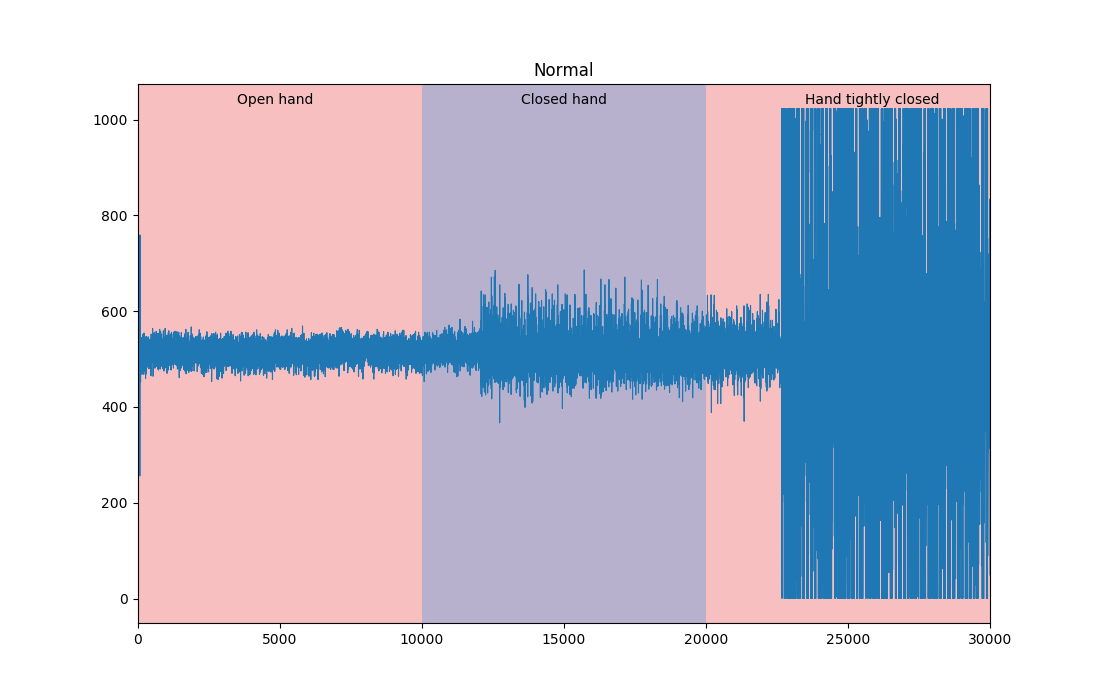

In [100]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()

df['Sample'].plot(linewidth=0.8)
plt.title('Normal')

plt.axvspan(.0, 9999, facecolor='#F08080', alpha=0.5)
plt.axvspan(10000, 19999, facecolor='#70659e', alpha=0.5)
plt.axvspan(20000, 29999, facecolor='#F08080', alpha=0.5)
plt.annotate('Open hand', xy=(3500, df['Sample'].max()*1.01))  
plt.annotate('Closed hand', xy=(13500, df['Sample'].max()*1.01))
plt.annotate('Hand tightly closed', xy=(23500, df['Sample'].max()*1.01))

#fig_name = 'fig_' + files[0] + '.png'
#fig.set_size_inches(w=11,h=7)
#fig.savefig(fig_name)

---
# Filtering
---

### RMS Function

In [25]:
import numpy as np
def window_rms(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))

<IPython.core.display.Javascript object>


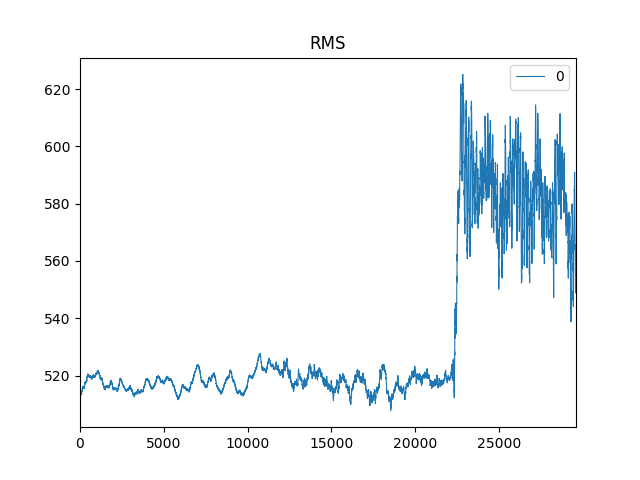

In [27]:
rms = window_rms(df['Sample'],400)

df_rms = pd.DataFrame(rms)

df_rms.plot(linewidth=0.8)
plt.title('RMS')

### Filter Function

In [101]:
def filteremg(time, emg, low_pass=10., sfreq=2000., high_band=20., low_band=450.):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

def plot_fremg(df):   
    # plot graphs
    fig = plt.figure()
    

    #plt.subplot(4, 1, 1).xaxis.set_visible(False)
    #plt.plot.set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(40)) + ' Hz' + '\n VL-d')
    plt.plot(fr_emg['Time'], fr_emg['Filtered'])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.axvspan(.0, 9999, facecolor='#F08080', alpha=0.5)
    plt.axvspan(10000, 19999, facecolor='#70659e', alpha=0.5)
    plt.axvspan(20000, 29999, facecolor='#F08080', alpha=0.5)
    plt.annotate('Open hand', xy=(3500, fr_emg['Filtered'].max()))  
    plt.annotate('Closed hand', xy=(13500, fr_emg['Filtered'].max()))
    plt.annotate('Hand tightly closed', xy=(23500, fr_emg['Filtered'].max()))
        

    fig_name = 'fig_' + files[0] + '_filtered.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)



<IPython.core.display.Javascript object>


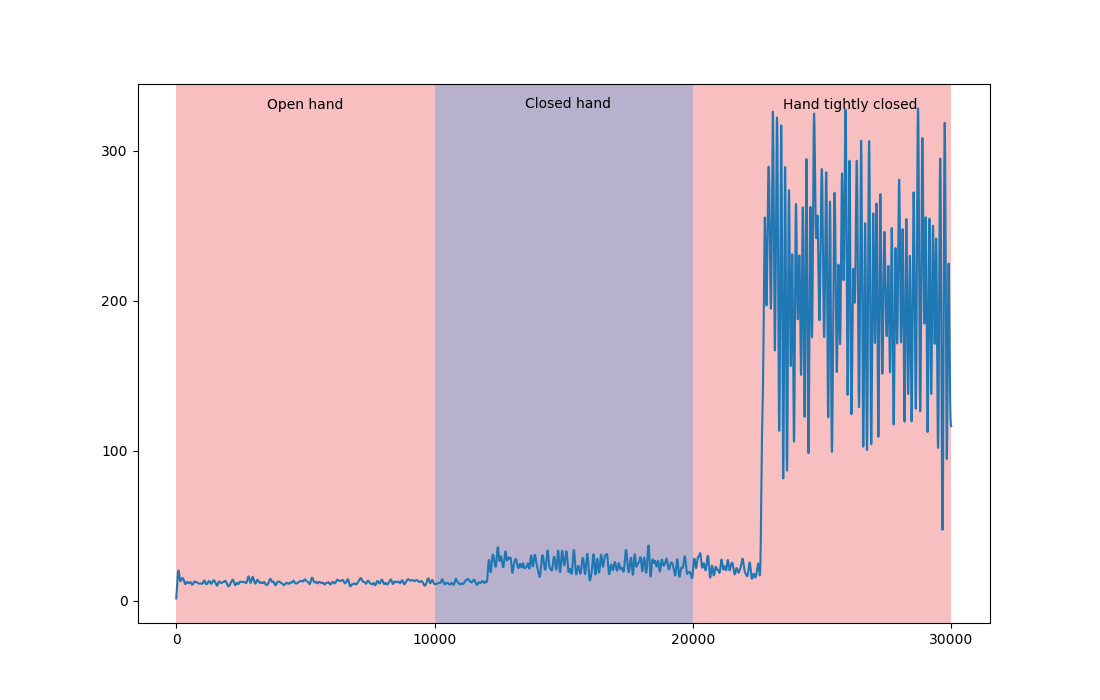

In [102]:
df['Time'] = (range(0,len(df)))
# show what different low pass filter cut-offs do
fr_emg = pd.DataFrame(df['Time'])

emg_correctmean = np.array(df['Sample'])
fr_emg['Filtered'] = pd.DataFrame(filteremg(df['Time'], emg_correctmean, low_pass=30))


plot_fremg(fr_emg)

### Process automation

In [8]:
def filter_signal(emg, low_pass=10., sfreq=2000., high_band=20., low_band=450.):
    """
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

In [19]:
def plot_fremg(data):   
    # plot graphs
    fig = plt.figure()
    

    #plt.subplot(4, 1, 1).xaxis.set_visible(False)
    #plt.plot.set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(40)) + ' Hz' + '\n VL-d')
    plt.plot(data)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.axvspan(.0, 9999, facecolor='#F08080', alpha=0.5)
    plt.axvspan(10000, 19999, facecolor='#70659e', alpha=0.5)
    plt.axvspan(20000, 29999, facecolor='#F08080', alpha=0.5)
    plt.annotate('Open hand', xy=(3500, data.max()))  
    plt.annotate('Closed hand', xy=(13500, data.max()))
    plt.annotate('Hand tightly closed', xy=(23500, data.max()))
        

    fig_name = 'fig_' + str(int(40)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

In [197]:
#plt.figure()
#plt.plot(filter_signal(df['Sample'], low_pass=3)[50:])

In [13]:
data = np.load('DB_HAND/'+'data_154743'+'.npy')

In [14]:
data = filter_signal(data[:,0], low_pass=3)

In [22]:
#plt.plot(data)

---
# Processing
---

In [103]:
def proccess_data(file_,DATA):
    
    #datafile = os.path.join(DATADIR, DATAFILE)
    #datafile = DATAFILE

    # Remove header, Nan and trash
    data = np.load('DB_HAND/'+file_+'.npy')
    data = filter_signal(data[:,0], low_pass=30)
    #plot_fremg(data)
    Xc_1 = data[:10000]
    Xc_2 = data[10000:20000]
    Xc_3 = data[20000:]
    
    print '\nXc_1 cleaned shape ', Xc_1.shape
    print 'Xc_2 cleaned shape ', Xc_2.shape
    print 'Xc_3 cleaned shape ', Xc_3.shape
    
    #Create temporal serie
    NUM_SAMPLES = 50
    
    Xc_1 = generate_envelope(Xc_1, NUM_SAMPLES)
    Xc_2 = generate_envelope(Xc_2, NUM_SAMPLES)
    Xc_3 = generate_envelope(Xc_3, NUM_SAMPLES)
    
    print 'Xc_1 temporal-serie shape ', Xc_1.shape
    print 'Xc_2 temporal-serie shape ', Xc_2.shape
    print 'Xc_3 temporal-serie shape ', Xc_3.shape
    
    #Labeling the type of movement
    C = (np.ones(len(Xc_1))*0).reshape((len(Xc_1),1))
    Xc_1 = np.hstack((Xc_1.reshape(Xc_1.shape),C.reshape((len(Xc_1),1))))


    C = (np.ones(len(Xc_2))*1).reshape((len(Xc_2),1))
    Xc_2 = np.hstack((Xc_2.reshape(Xc_2.shape),C.reshape((len(Xc_2),1))))
    
    C = (np.ones(len(Xc_3))*2).reshape((len(Xc_3),1))
    Xc_3 = np.hstack((Xc_3.reshape(Xc_3.shape),C.reshape((len(Xc_3),1))))
    
    print 'Xc_1 labeled shape ', Xc_1.shape
    print 'Xc_2 labeled shape ', Xc_2.shape
    print 'Xc_3 labeled shape ', Xc_3.shape
    
    # Salving in file on the folder <classifier_data>
    from Data_Savior_J import save_it_now
    save_it_now(Xc_1, './preproc_filtered_data/'+file_+'_f_honp.'+'data')
    print file_+'_o.'+'data'
    
    save_it_now(Xc_2, './preproc_filtered_data/'+file_+'_f_hclp.'+'data')
    print file_+'_cmf.'+'data'
    
    save_it_now(Xc_3, './preproc_filtered_data/'+file_+'_f_hchp.'+'data')
    print file_+'_ctf.'+'data'
    
    DATA.append(file_+'_f_honp.'+'data')
    DATA.append(file_+'_f_hclp.'+'data')
    DATA.append(file_+'_f_hchp.'+'data')

In [104]:
files = ['data_154743','data_155334','data_155743','data_161034', 'data_161420']
DATA = []
for i in files:
    proccess_data(i,DATA)


Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_3 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc_3 temporal-serie shape  (9951, 50)
Xc_1 labeled shape  (9951, 51)
Xc_2 labeled shape  (9951, 51)
Xc_3 labeled shape  (9951, 51)
Saved to file
data_154743_o.data
Saved to file
data_154743_cmf.data
Saved to file
data_154743_ctf.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_3 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc_3 temporal-serie shape  (9951, 50)
Xc_1 labeled shape  (9951, 51)
Xc_2 labeled shape  (9951, 51)
Xc_3 labeled shape  (9951, 51)
Saved to file
data_155334_o.data
Saved to file
data_155334_cmf.data
Saved to file
data_155334_ctf.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_3 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc_3 temporal-serie shape  (9951, 50)
Xc

In [221]:
Xc = load_file("preproc_filtered_data/"+DATA[0])
for i in DATA[1:]:
    Xc = np.vstack((Xc,load_file("preproc_filtered_data/"+i))) 

In [222]:
Xc

array([[  1.57496459,   1.78400148,   1.9982007 , ...,  14.65043079,
         14.91262881,   0.        ],
       [  1.78400148,   1.9982007 ,   2.21744912, ...,  14.91262881,
         15.17078619,   0.        ],
       [  1.9982007 ,   2.21744912,   2.44162744, ...,  15.17078619,
         15.42467625,   0.        ],
       ..., 
       [ 31.49346274,  31.49988204,  31.50440064, ...,  31.17318209,
         31.17167113,   2.        ],
       [ 31.49988204,  31.50440064,  31.50713027, ...,  31.17167113,
         31.17041848,   2.        ],
       [ 31.50440064,  31.50713027,  31.50818205, ...,  31.17041848,
         31.16939561,   2.        ]])

In [223]:
X = Xc[:,0:(Xc.shape[1]-2)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))

X.shape, y.shape

((149265, 49), (149265,))

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, 
                                                    random_state=10)

In [225]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [226]:
print X_train_std.shape

(111948, 51)


# Random Forest Classifier

In [227]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 52.8 s, sys: 0 ns, total: 52.8 s
Wall time: 52.9 s

Predict time
CPU times: user 472 ms, sys: 0 ns, total: 472 ms
Wall time: 471 ms

ClassifyRF accuracy:---------->99.99 %


## Confusion Matrix

<IPython.core.display.Javascript object>


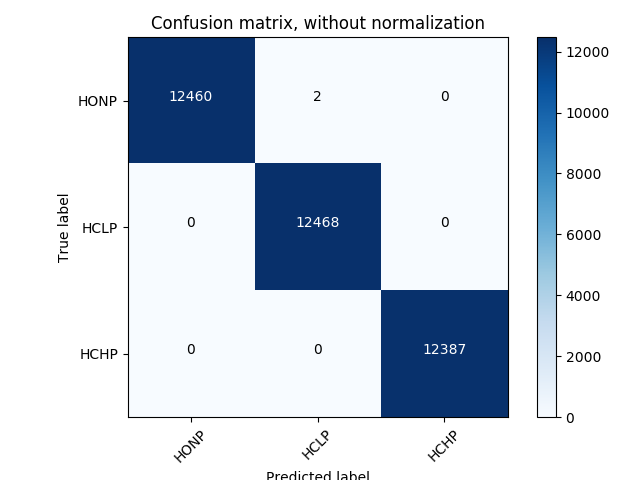

Confusion matrix, without normalization
[[12460     2     0]
 [    0 12468     0]
 [    0     0 12387]]


<IPython.core.display.Javascript object>


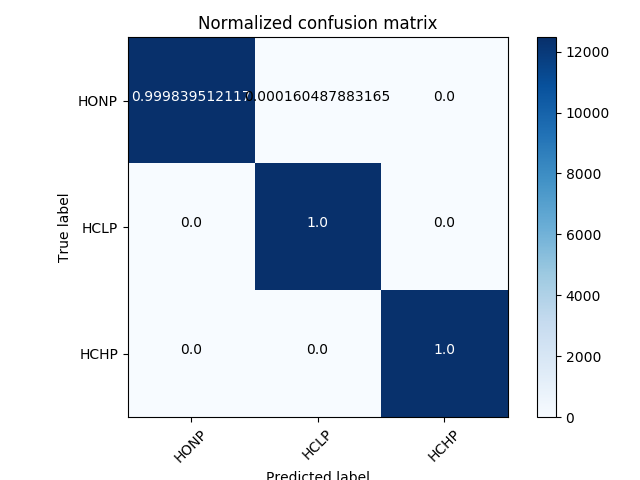

Normalized confusion matrix
[[  1.00e+00   1.60e-04   0.00e+00]
 [  0.00e+00   1.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   1.00e+00]]


In [228]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['HONP', 'HCLP', 'HCHP'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Support Vector Machine

In [254]:
from sklearn import svm, datasets

print 'Processing time RBF'
%time svm = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''

from sklearn.metrics import accuracy_score

print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Processing time RBF
CPU times: user 15.5 s, sys: 76 ms, total: 15.6 s
Wall time: 15.6 s

Predict time
CPU times: user 2.91 s, sys: 0 ns, total: 2.91 s
Wall time: 2.91 s
SVM-RBF accuracy:---------->100.00 %


## Confusion Matrix

<IPython.core.display.Javascript object>


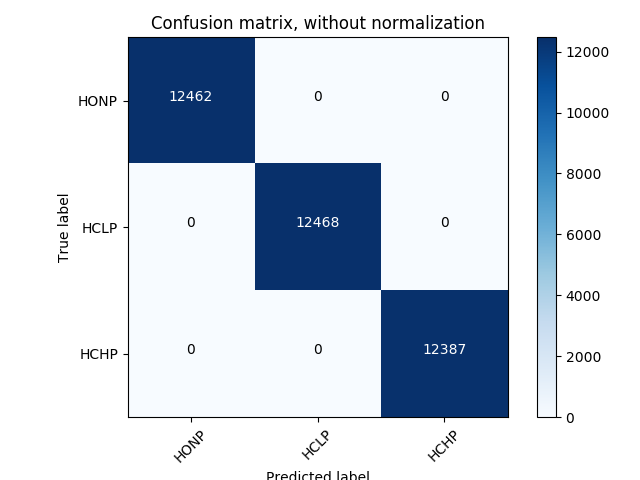

Confusion matrix, without normalization
[[12462     0     0]
 [    0 12468     0]
 [    0     0 12387]]


<IPython.core.display.Javascript object>


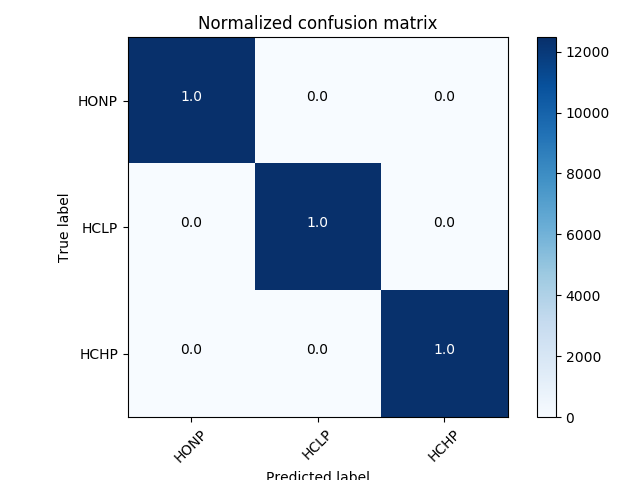

Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [255]:
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib notebook
class_names = np.array(['HONP', 'HCLP', 'HCHP'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()